### Loading important Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Datasets

In [2]:
df1=pd.read_csv('car data.csv')

In [3]:
df2=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
df3=pd.read_csv('Car details v3.csv')

### Exploratry Data Analysis and Feature Engineering:

In [5]:
print(df1.shape)
df1.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
print(df2.shape)
df2.head()

(4340, 8)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
print(df3.shape)
df3.head(15)

(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [8]:
df3.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [9]:
df3.name.nunique()

2058

In [10]:
df1.Car_Name.nunique()

98

In [11]:
df2.name.nunique()

1491

All the datasets are similiar hence we will go with the maximum no. of features of data sets

First we will Figure out no. of missing values

In [12]:
null_values=[]
for i in df3.columns:
    null_values.append([i,round((df3[i].isnull().sum()/len(df3[i]))*100,3)])
    

In [13]:
df_null=pd.DataFrame(null_values, columns=['Column_Name','%'])

In [14]:
df_null

,Column_Name,%
0,name,0.000
1,year,0.000
2,selling_price,0.000
3,km_driven,0.000
4,fuel,0.000
5,seller_type,0.000
6,transmission,0.000
7,owner,0.000
8,mileage,2.719
9,engine,2.719


To Deal with null Values we can do the following:
1. Remove the Whole Column
2. Remove the whole Row
3. Fill with any number:
    1. fill with '0' or '999'
    2. fill with mean or median
4. Imputation method
5. Use sepearte regression method  to fill the values

We will Try 5.method

In [15]:
df3.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

### Mileage column

In [16]:
for i in range(len(df3['mileage'])):
    if pd.isna(df3['mileage'][i])==False:
        df3['mileage'][i]=float(df3['mileage'][i][:4])


C:\Users\ISHUSI~1\AppData\Local\Temp/ipykernel_16772/1503753524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['mileage'][i]=float(df3['mileage'][i][:4])


C:\Users\ISHU SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

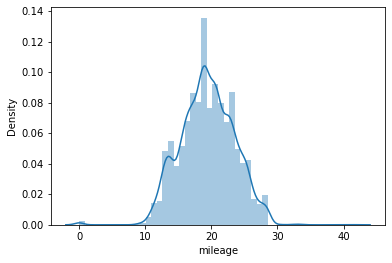

In [17]:
sns.distplot(df3['mileage'], kde=True)

Thus we will replace the missing values with mean 

In [18]:
df3['mileage'].fillna(df3['mileage'].mean(),inplace=True)

In [19]:
df3['mileage'].isnull().sum()

0

### Engine column

In [20]:
df3['engine']=df3['engine'].str.replace(r'\D'," ").astype(float)

C:\Users\ISHUSI~1\AppData\Local\Temp/ipykernel_16772/1564637819.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['engine']=df3['engine'].str.replace(r'\D'," ").astype(float)


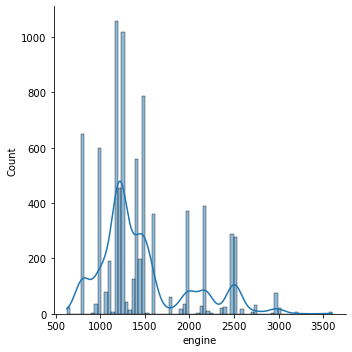

In [21]:
sns.displot(df3['engine'], kde=True)

In [22]:
df3['engine'].fillna(df3['engine'].mean(), inplace=True)

### Max_power column

In [23]:
for i in range(len(df3['max_power'])):
    if pd.isna(df3['max_power'][i])==False:
        df3['max_power'][i]=df3['max_power'][i][-len(df3['max_power'][i]):-4:1]
        if df3['max_power'][i]=='':
            df3['max_power'][i]=float('nan')
        else:
            df3['max_power'][i]=float(df3['max_power'][i])
        

C:\Users\ISHUSI~1\AppData\Local\Temp/ipykernel_16772/3526320716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['max_power'][i]=df3['max_power'][i][-len(df3['max_power'][i]):-4:1]
C:\Users\ISHUSI~1\AppData\Local\Temp/ipykernel_16772/3526320716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['max_power'][i]=float(df3['max_power'][i])
C:\Users\ISHUSI~1\AppData\Local\Temp/ipykernel_16772/3526320716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [24]:
df3['max_power'].fillna(df3['max_power'].mean(),inplace=True)

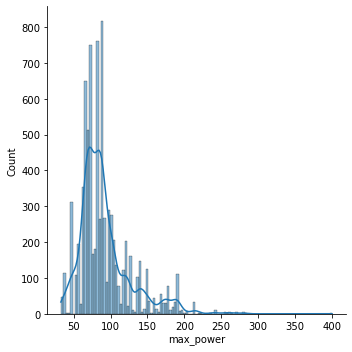

In [25]:
sns.displot(df3['max_power'],kde=True)

### Torque column

Max_torque depends upon the engine and rpm, it has different torques for different speeds and rpm also it doesn't support any of the factors in SP of cars in general so we will be droppping that field

In [26]:
df3.drop(['torque'],axis=1,inplace=True)

### Seats Column

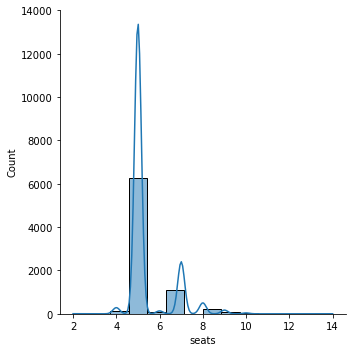

In [27]:
sns.displot(df3['seats'],kde=True)

In [28]:
df3['seats'].value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

: Most cars commonly come up with 5 no.of seats

In [29]:
df3['seats'].fillna(5, inplace=True)

In [30]:
df3['name'].nunique()


2058

Dropping the name Column:

In [31]:
df3.drop(['name'],axis=1, inplace=True)

In [32]:
df3['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [33]:
df3['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [34]:
df3['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [35]:
df3['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

#### Categorical->numerical Variable

In [36]:
df4 = pd.get_dummies(df3, columns=['fuel','seller_type','transmission','owner'], drop_first=True)

In [37]:
df4

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.4,1248.0,74.00,5.0,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21.1,1498.0,103.52,5.0,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,17.7,1497.0,78.00,5.0,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,23.0,1396.0,90.00,5.0,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,16.1,1298.0,88.20,5.0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.5,1197.0,82.85,5.0,0,0,1,1,0,1,0,0,0,0
8124,2007,135000,119000,16.8,1493.0,110.00,5.0,1,0,0,1,0,1,1,0,0,0
8125,2009,382000,120000,19.3,1248.0,73.90,5.0,1,0,0,1,0,1,0,0,0,0
8126,2013,290000,25000,23.5,1396.0,70.00,5.0,1,0,0,1,0,1,0,0,0,0


### Scaling -using Standard Scaler

We need to do some scaling with column like km driven, engine

In [38]:
scale_col=['year','km_driven','mileage','engine','max_power','seats']

In [39]:
for i in scale_col:
    scale=StandardScaler().fit(df4[[i]])
    df4[i]=scale.transform(df4[[i]])

In [40]:
df4.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.048464,450000,1.338363,1.005857,-0.423804,-0.498884,-0.427258,1,0,0,1,0,1,0,0,0,0
1,0.048464,370000,0.887411,0.427962,0.079227,0.338481,-0.427258,1,0,0,1,0,1,0,1,0,0
2,-1.929775,158000,1.241098,-0.426316,0.077215,-0.385420,-0.427258,0,0,1,1,0,1,0,0,0,1
3,-0.940656,225000,1.011202,0.905354,-0.126009,-0.045027,-0.427258,1,0,0,1,0,1,0,0,0,0
4,-1.682495,130000,0.887411,-0.828330,-0.323198,-0.096086,-0.427258,0,0,1,1,0,1,0,0,0,0


In [41]:
X=df4.drop(['selling_price'], axis=1)
y=df4['selling_price']

In [42]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

### ML Algorithm to select:

In [44]:
ln=LinearRegression()
ls=Lasso()
rndm=RandomForestRegressor()
svc=SVC()
knn=KNeighborsRegressor()

In [45]:
models=[ln,ls,rndm,svc,knn]
model_score=[]

In [46]:
for i in models:
    i.fit(X_train,y_train)
    model_score.append(i.score(X_test, y_test))

In [47]:
model_score

[0.7051957964694356,
 0.7052041319024833,
 0.9773275293694729,
 0.14514145141451415,
 0.9604594447991844]

In [48]:
df_score=pd.DataFrame(model_score, index=['Linear','Lasso','RandomForest','SVC','K-Nearest'],columns=['Score'])

In [49]:
df_score.head()

,Score
Linear,0.705196
Lasso,0.705204
RandomForest,0.977328
SVC,0.145141
K-Nearest,0.960459


Clearly Random Forest Works well with the data set and SVC Performs worst 

In [51]:
import pickle
with open('random_forest.pkl','wb') as f:
    pickle.dump(rndm,f)